In [328]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import ImageRegistration as ir
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(197, 233)


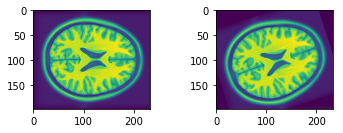

In [436]:
# 1 Define images
## Moving Image
t1_img = nib.load('mni_icbm152_nlin_asym_09a_nifti/mni_icbm152_nlin_asym_09a/mni_icbm152_t1_tal_nlin_asym_09a.nii')
t1_data = t1_img.get_fdata()
mi_data = t1_data[:, :, 94]
print(mi_data.shape)
mi_origin = np.array([-mi_data.shape[0]/2,-mi_data.shape[1]/2])
mi_org = ir.Image(mi_data, mi_spacing, mi_origin)

## Create ReferenceImage
theta_opt = np.pi/10
a_opt = np.cos(theta_opt)
b_opt = -np.sin(theta_opt)
tx_opt = 4
d_opt = np.sin(theta_opt)
e_opt = np.cos(theta_opt)
ty_opt = 0
T_opt = np.array([[a_opt, b_opt, tx_opt],[d_opt, e_opt, ty_opt],[0,0,1]], dtype=float)
r_spacing = np.array([1,1])
r_origin = np.array([-mi_data.shape[0]/2,-mi_data.shape[1]/2])
r_org = ir.Transform(mi_org, ir.Image(np.zeros(mi_data.shape), r_spacing, r_origin), T_opt, False)
ax = plt.subplot(2,2,1)
ax.imshow(mi_org.Values)

ax = plt.subplot(2,2,2)
ax.imshow(r_org.Values)

In [437]:
#POINTS based with gradient descent
ones = np.ones((1, U_idx.shape[0]))

#1 select points of interest
U_idx = np.array([[20,100], [200,100], [100,50], [100,150]])
U = U_idx * mi_org.Spacing[0] + mi_org.Origin[0]
U = np.concatenate((U, np.copy(ones).T), axis=1)
X = np.dot(T_opt, U.T).T

print(T_opt)
print(U)
print(X)

[[ 0.95105652 -0.30901699  4.        ]
 [ 0.30901699  0.95105652  0.        ]
 [ 0.          0.          1.        ]]
[[-78.5   1.5   1. ]
 [101.5   1.5   1. ]
 [  1.5 -48.5   1. ]
 [  1.5  51.5   1. ]]
[[-71.12146202 -22.83124928   1.        ]
 [100.06871091  32.7918097    1.        ]
 [ 20.413909   -45.66271555   1.        ]
 [-10.48779044  49.44293608   1.        ]]


e: 0 cost: 535.3508064211943
tx(t+1): 0.2574673491484862 tx(t): 0 dTx: -25.74673491484862
ty(t+1): 0.154815619030391 ty(t): 0 dTy: -15.4815619030391
e: 1 cost: 443.4372457035961
tx(t+1): 0.5049521001005788 tx(t): 0.2574673491484862 dTx: -24.748475095209262
ty(t+1): 0.2851446030107143 ty(t): 0.154815619030391 dTy: -13.03289839803233
e: 2 cost: 378.34108405703427
tx(t+1): 0.7401765917346818 tx(t): 0.5049521001005788 dTx: -23.5224491634103
ty(t+1): 0.3953802719104985 ty(t): 0.2851446030107143 dTy: -11.023566889978419
e: 3 cost: 329.7793414527536
tx(t+1): 0.9620481581376852 tx(t): 0.7401765917346818 dTx: -22.187156640300348
ty(t+1): 0.4888063585466418 ty(t): 0.3953802719104985 dTy: -9.342608663614328
e: 4 cost: 291.8422159865779
tx(t+1): 1.1702322345730294 tx(t): 0.9620481581376852 dTx: -20.818407643534425
ty(t+1): 0.5679371213003028 ty(t): 0.4888063585466418 dTy: -7.913076275366109
e: 5 cost: 261.0222265377814
tx(t+1): 1.3648697699160808 tx(t): 1.1702322345730294 dTx: -19.46375353430514
t

e: 481 cost: 7.797099689386391e-19
tx(t+1): 3.9999999999553624 tx(t): 3.999999999953073 dTx: -2.2891910589351028e-10
ty(t+1): 1.895602473390116e-10 ty(t): 1.9928004563856831e-10 dTy: 9.719798299556714e-10
e: 482 cost: 7.055039948389432e-19
tx(t+1): 3.9999999999575393 tx(t): 3.9999999999553624 dTx: -2.177067415232159e-10
ty(t+1): 1.8031480736984833e-10 ty(t): 1.895602473390116e-10 dTy: 9.245439969163272e-10
e: 483 cost: 6.383613790829328e-19
tx(t+1): 3.99999999995961 tx(t): 3.9999999999575393 dTx: -2.070983384783176e-10
ty(t+1): 1.715200646579777e-10 ty(t): 1.8031480736984833e-10 dTy: 8.79474271187064e-10
e: 484 cost: 5.77605311041681e-19
tx(t+1): 3.9999999999615805 tx(t): 3.99999999995961 dTx: -1.9702284248523938e-10
ty(t+1): 1.63154347649959e-10 ty(t): 1.715200646579777e-10 dTy: 8.365717008018692e-10
e: 485 cost: 5.226359202391567e-19
tx(t+1): 3.9999999999634546 tx(t): 3.9999999999615805 dTx: -1.8741985741144163e-10
ty(t+1): 1.551964821722666e-10 ty(t): 1.63154347649959e-10 dTy: 7.957

ty(t+1): -3.5306690389394487e-15 ty(t): -3.743831859667479e-15 dTy: -2.1316282072803006e-14
e: 876 cost: 1.0199971504507683e-27
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.743831859667479e-15 ty(t): -3.5306690389394487e-15 dTy: 2.1316282072803006e-14
e: 877 cost: 9.064011800989426e-28
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.5306690389394487e-15 ty(t): -3.743831859667479e-15 dTy: -2.1316282072803006e-14
e: 878 cost: 1.0199971504507683e-27
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.743831859667479e-15 ty(t): -3.5306690389394487e-15 dTy: 2.1316282072803006e-14
e: 879 cost: 9.064011800989426e-28
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.5306690389394487e-15 ty(t): -3.743831859667479e-15 dTy: -2.1316282072803006e-14
e: 880 cost: 1.0199971504507683e-27
tx(t+1): 3.999999999999996 tx(t): 3.9999

e: 1314 cost: 1.0199971504507683e-27
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.743831859667479e-15 ty(t): -3.5306690389394487e-15 dTy: 2.1316282072803006e-14
e: 1315 cost: 9.064011800989426e-28
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.5306690389394487e-15 ty(t): -3.743831859667479e-15 dTy: -2.1316282072803006e-14
e: 1316 cost: 1.0199971504507683e-27
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.743831859667479e-15 ty(t): -3.5306690389394487e-15 dTy: 2.1316282072803006e-14
e: 1317 cost: 9.064011800989426e-28
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.5306690389394487e-15 ty(t): -3.743831859667479e-15 dTy: -2.1316282072803006e-14
e: 1318 cost: 1.0199971504507683e-27
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.743831859667479e-15 ty(t): -3.5306

e: 1814 cost: 1.0199971504507683e-27
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.743831859667479e-15 ty(t): -3.5306690389394487e-15 dTy: 2.1316282072803006e-14
e: 1815 cost: 9.064011800989426e-28
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.5306690389394487e-15 ty(t): -3.743831859667479e-15 dTy: -2.1316282072803006e-14
e: 1816 cost: 1.0199971504507683e-27
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.743831859667479e-15 ty(t): -3.5306690389394487e-15 dTy: 2.1316282072803006e-14
e: 1817 cost: 9.064011800989426e-28
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.5306690389394487e-15 ty(t): -3.743831859667479e-15 dTy: -2.1316282072803006e-14
e: 1818 cost: 1.0199971504507683e-27
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.743831859667479e-15 ty(t): -3.5306

e: 2294 cost: 1.0199971504507683e-27
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.743831859667479e-15 ty(t): -3.5306690389394487e-15 dTy: 2.1316282072803006e-14
e: 2295 cost: 9.064011800989426e-28
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.5306690389394487e-15 ty(t): -3.743831859667479e-15 dTy: -2.1316282072803006e-14
e: 2296 cost: 1.0199971504507683e-27
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.743831859667479e-15 ty(t): -3.5306690389394487e-15 dTy: 2.1316282072803006e-14
e: 2297 cost: 9.064011800989426e-28
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.5306690389394487e-15 ty(t): -3.743831859667479e-15 dTy: -2.1316282072803006e-14
e: 2298 cost: 1.0199971504507683e-27
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.743831859667479e-15 ty(t): -3.5306

e: 2647 cost: 9.064011800989426e-28
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.5306690389394487e-15 ty(t): -3.743831859667479e-15 dTy: -2.1316282072803006e-14
e: 2648 cost: 1.0199971504507683e-27
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.743831859667479e-15 ty(t): -3.5306690389394487e-15 dTy: 2.1316282072803006e-14
e: 2649 cost: 9.064011800989426e-28
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.5306690389394487e-15 ty(t): -3.743831859667479e-15 dTy: -2.1316282072803006e-14
e: 2650 cost: 1.0199971504507683e-27
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.743831859667479e-15 ty(t): -3.5306690389394487e-15 dTy: 2.1316282072803006e-14
e: 2651 cost: 9.064011800989426e-28
tx(t+1): 3.999999999999996 tx(t): 3.999999999999996 dTx: -1.7763568394002505e-14
ty(t+1): -3.5306690389394487e-15 ty(t): -3.7438

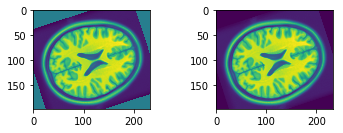

In [438]:
# Initial guess T
mi = ir.Image(values=np.copy(mi_org.Values), spacing=mi_org.Spacing, origin= mi_org.Origin)
mi.Values = (mi.Values - np.mean(mi.Values))

r = ir.Image(values=np.copy(r_org.Values), spacing=r_org.Spacing, origin= r_org.Origin)
r.Values = (r.Values - np.mean(r.Values))

theta = 0
a = np.cos(theta)
b = -np.sin(theta)
c = np.cos(theta)
tx = 0
ty = 0
T = np.array([[a, b, tx],[-b, a, ty],[0,0,1]], dtype=float)
alphaR = 1e-5
alphaT = 1e-2
for e in range(3000):    
    dA = 0
    dB = 0
    dC = 0
    dTx = 0
    dTy = 0
    dTheta = 0    
    Xprim = np.dot(T, U.T).T
    diff = (Xprim.T - X.T)
    cost = 1/m * np.sum((diff)**2)
    print("e: {0} cost: {1}".format(e, cost))
    for i in range(m):        
        dA = dA + 2 * (U[i,0] * (Xprim[i,0] - X[i,0]))
        dB = dA + 2 * (U[i,1] * (Xprim[i,0] - X[i,0]) - U[i,0] * (Xprim[i,1] - X[i,1]))
        dC = dC + 2 * (U[i,1] * (Xprim[i,1] - X[i,1]))
        dTx = dTx + 2 * ((Xprim[i,0] - X[i,0]))
        dTy = dTy + 2 * ((Xprim[i,1] - X[i,1]))
    at = a
    a = at - alphaR * dA    
    bt = b
    b = bt - alphaR * dB    
    ct = c
    c = ct - alphaR * dC    
    txt = tx
    tx = txt - alphaT * dTx    
    tyt = ty
    ty = tyt - alphaT * dTy
    print("tx(t+1): {0} tx(t): {1} dTx: {2}".format(tx, txt, dTx))
    print("ty(t+1): {0} ty(t): {1} dTy: {2}".format(ty, tyt, dTy))
    if False:
        print("a(t+1): {0} a(t): {1} dA: {2}".format(a, at, dA))
        print("b(t+1): {0} b(t): {1} dB: {2}".format(b, bt, dB))    
        print("c(t+1): {0} c(t): {1} dC: {2}".format(c, ct, dC))
        
    T = np.array([[a, b, tx],[-b, a, ty],[0,0,1]], dtype=float)   
    
print(T)
print(np.cos(theta_opt))
print(tx_opt)
print(ty_opt)
TImage = ir.Transform(image = mi, refImg= r, T=T,nullFill=False)

ax = plt.subplot(2,2,1)
ax.imshow(TImage.Values)

ax = plt.subplot(2,2,2)
ax.imshow(r_org.Values)

nan

Episode: 0, Cost: 383.2442671765865
P: [[ 0.99895522 -0.00369326  0.98564255  0.15142554 -0.13025003]]
Episode: 1, Cost: 382.0746206635638
P: [[ 1.00081995 -0.00357872  0.97247441  0.38379767 -0.07230033]]
Episode: 2, Cost: 385.47411362362595
P: [[ 1.00394643 -0.00165036  0.95732374  0.61119979  0.0819719 ]]
Episode: 3, Cost: 396.83019483206715
P: [[1.00707006 0.00136479 0.94392776 0.86298856 0.29270375]]
Episode: 4, Cost: 407.9483010032332
P: [[1.0103514  0.00476365 0.93198146 1.13576682 0.53537911]]
Episode: 5, Cost: 416.88104510644143
P: [[1.01202464 0.00785297 0.9198325  1.45803417 0.7634011 ]]
Episode: 6, Cost: 423.61654451904593
P: [[1.01281884 0.01004475 0.90951222 1.78610261 0.98379688]]
Episode: 7, Cost: 427.5005872630266
P: [[1.01286118 0.01134119 0.90053099 2.1192236  1.17892848]]
Episode: 8, Cost: 428.86528783665017
P: [[1.0125515  0.01200699 0.89282935 2.45081208 1.33973809]]
Episode: 9, Cost: 429.23505456746557
P: [[1.01217932 0.0123123  0.88629324 2.76187911 1.45438389]]

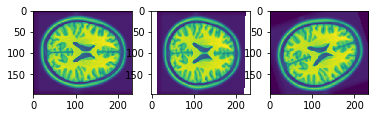

In [439]:
# Intensity based with Gauss Newton
def CalculateCost(residual):
    return np.sum(residual**2)/residual.size

def GetResidual(m,r,T):
    residual = []       
    for i in range(m.Values.shape[0]):
        for j in range(m.Values.shape[1]):
            if m.Values[i,j] != m.Values[i,j]: # Null check                
                continue                
            x = i * m.Spacing[0] + m.Origin[0]
            y = j * m.Spacing[1] + m.Origin[1]            
            f_r = ir.BilinearInterpolate(x=x, y=y, image=r)         
            residual.append(m.Values[i,j] - f_r)
    return np.array([residual], dtype=float).T

def GetJacobian(m, P):
    a = P[0,0]
    b = P[1,0]
    c = P[2,0]
    tx = P[3,0]
    ty = P[4,0]
    T = np.array([[a, b, tx],[-b, c, ty],[0,0,1]], dtype=float)
    h = 1e-4
    J = []    
    for i in range(m.Values.shape[0]):
        for j in range(m.Values.shape[1]):
            if m.Values[i,j] != m.Values[i,j]: # Null check                
                continue                
            x = i * m.Spacing[0] + m.Origin[0]
            y = j * m.Spacing[1] + m.Origin[1]            
            U = np.linalg.solve(T, np.array([[x,y,1]], dtype=float).T)
            u = U[0,0]
            v = U[1,0]            
            f_mxh1 = ir.BilinearInterpolate(x=x+h, y=y, image=m)
            f_mxh2 = ir.BilinearInterpolate(x=x-h, y=y, image=m)
            f_myh1 = ir.BilinearInterpolate(x=x, y=y+h, image=m)
            f_myh2 = ir.BilinearInterpolate(x=x, y=y-h, image=m)
            dfx = (f_mxh1 - f_mxh2)/(2*h)
            dfy = (f_myh1 - f_myh2)/(2*h)
            
            # 5 parameters            
            dA = u*dfx
            dB = -u*dfx + v*dfy
            dC = v*dfx
            dtx = dfx
            dty = dfy
            j = [dA, dB, dC, dtx, dty]
                        
            J.append(j)
    return np.array(J, dtype=float)

theta = 0
a = np.cos(theta)
b = -np.sin(theta)
c = np.cos(theta)
tx = 0
ty = 0
P = np.array([[a, b, c, tx, ty]], dtype=float).T

mi = ir.Image(values=np.copy(mi_org.Values), spacing=mi_org.Spacing, origin= mi_org.Origin)
mi.Values = (mi.Values - np.mean(mi.Values))

r = ir.Image(values=np.copy(r_org.Values), spacing=r_org.Spacing, origin= r_org.Origin)
r.Values = (r.Values - np.mean(r.Values))
alpha = np.array([[1],[1],[1],[1],[1]])
for i in range(10):
    T = np.array([[P[0,0], P[1,0], P[3,0]]
                ,[-P[1,0], P[2,0], P[4,0]]
                ,[0,0,1]], dtype=float)
    mo = ir.Transform(image=mi, refImg=r, T=T, nullFill=True)    
    residual = GetResidual(mo, r, T)
    cost = CalculateCost(residual)
    J = GetJacobian(mo, P)
    P = P + alpha * np.linalg.solve(np.dot(J.T, J), np.dot(J.T,residual))
    print("Episode: {0}, Cost: {1}".format(i, cost))
    print("P: {0}".format(P.T))

#print(residual)
#print(cost)
ax = plt.subplot(2,3,1)
ax.imshow(mi.Values)

ax = plt.subplot(2,3,2)
ax.imshow(mo.Values)

ax = plt.subplot(2,3,3)
ax.imshow(r.Values)

In [440]:
import cv2

ImportError: No module named 'cv2'